## What are the most demanded skills for the top 3 most popular data roles?

#### Methodology

1. Clean-up skill column
2. Calculate skill count based on "job_title_short"
3. Calculate skill percentage
4. Plot final findings

In [3]:
#  Importing Libraries
import ast
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from datasets import load_dataset

# Loading Data
dataset = load_dataset("lukebarousse/data_jobs")
df = dataset["train"].to_pandas()

# Data Cleanup
df["job_posted_date"] = pd.to_datetime(df.job_posted_date)
df["job_skills"] = df["job_skills"].apply(lambda x:  ast.literal_eval(x) if pd.notna(x) else x)

Using the latest cached version of the dataset since lukebarousse/data_jobs couldn't be found on the Hugging Face Hub
Found the latest cached dataset configuration 'default' at C:\Users\Liam McCann\.cache\huggingface\datasets\lukebarousse___data_jobs\default\0.0.0\1d815e9ce232eb27db11939c44eb048fe6d2e9ab (last modified on Wed Oct  9 21:05:33 2024).


In [8]:
df_US = df[df["job_country"] == "United States"]
df_skills = df_US.explode("job_skills")
df_skills_count = df_skills.groupby(["job_skills", "job_title_short"]).size()
df_skills_count = df_skills_count.reset_index(name = "skill_count").sort_values(by="skill_count", ascending=False)
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [13]:
job_titles = df_skills_count["job_title_short"].unique().tolist()
job_titles = sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

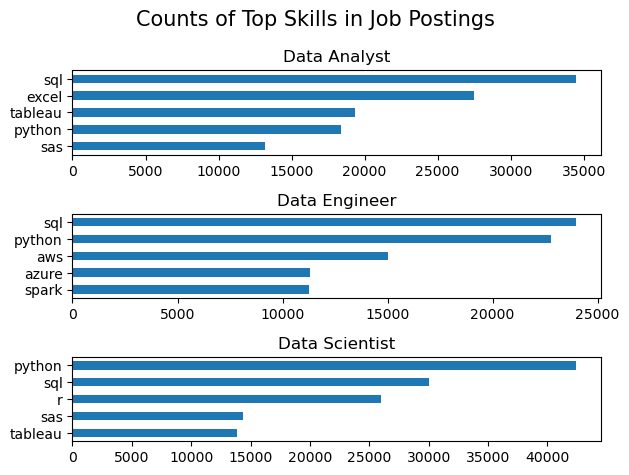

In [16]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count["job_title_short"] == job_title].head(5)
    df_plot.plot(kind="barh", x="job_skills", y="skill_count", ax=ax[i], title=job_title)

    ax[i].invert_yaxis()
    ax[i].set_ylabel("")
    ax[i].legend().set_visible(False)

fig.suptitle("Counts of Top Skills in Job Postings", fontsize=15)
plt.tight_layout()
plt.show()

In [21]:
df_job_title_count = df_US["job_title_short"].value_counts().reset_index(name="jobs_total")

In [19]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
245,clojure,Software Engineer,1
1738,vb.net,Senior Data Scientist,1
530,fortran,Machine Learning Engineer,1
1116,planner,Cloud Engineer,1


In [26]:
df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how="left", on="job_title_short")

df_skills_perc["skill_percent"] = 100* (df_skills_perc["skill_count"] / df_skills_perc["jobs_total"])

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,clojure,Software Engineer,1,1814,0.055127
1866,vb.net,Senior Data Scientist,1,12946,0.007724
1867,fortran,Machine Learning Engineer,1,921,0.108578
1868,planner,Cloud Engineer,1,423,0.236407


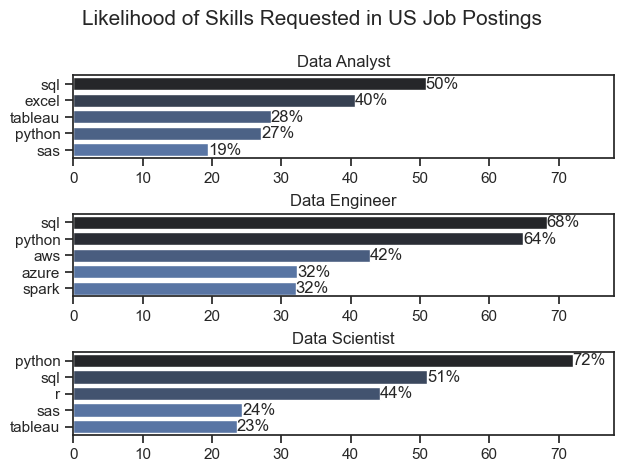

In [ ]:
fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc["job_title_short"] == job_title].head(5)
    
    sns.set_theme(style="ticks")
    sns.barplot(data=df_plot, x="skill_percent", y="job_skills", ax=ax[i], hue="skill_count", palette="dark:b_r")
    
    ax[i].set_xlim(0, 78)
    ax[i].set_title(job_title)
    ax[i].set_ylabel("")
    ax[i].set_xlabel("")
    ax[i].get_legend().remove()
    for j in range(len(df_plot)):
        ax[i].text(df_plot["skill_percent"].iloc[j],
                   df_plot["job_skills"].iloc[j],
                   f'{int(df_plot["skill_percent"].iloc[j]):.0f}%',
                   va="center")
    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle("Likelihood of Skills Requested in US Job Postings", fontsize=15)
plt.tight_layout(h_pad=0.5)
plt.show()